In [1]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [2]:
import numpy as np
import pandas as pd
from matplotlib import style
import datetime
import pandas_datareader.data as web 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Get the stock data using yahoo API:
# get 2009-2019 data to train our model
train_data = web.DataReader('BBCA.JK', 'yahoo', datetime.datetime(2010,1,4),datetime.datetime(2019,12,1)) 

# get 2020 data to present date to test the SVM model
# test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,2), datetime.date.today()) 
test_data = web.DataReader('BBCA.JK', 'yahoo',  datetime.datetime(2020,1,4), datetime.datetime(2021,12,1))

In [4]:
# sort by date
train_data = train_data.sort_values('Date')
test_data = test_data.sort_values('Date')

# fix the date 
train_data.reset_index(inplace=True)
train_data.set_index("Date", inplace=True)
test_data.reset_index(inplace=True)
test_data.set_index("Date", inplace=True)

date_test = test_data.copy()
date_test = date_test.reset_index()

In [5]:
training_data = train_data['Adj Close'].values
test_data = test_data['Adj Close'].values

h = [x for x in training_data]
pred = []
total_test = len(test_data)

for time_point in range(total_test):
    model = ARIMA(h, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    
    pred.append(yhat)
    true_test_value = test_data[time_point]
    h.append(true_test_value)

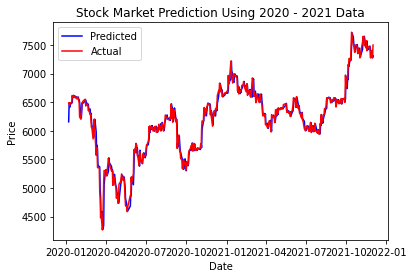

In [8]:
plt.plot(date_test["Date"], pred, color='blue',label='Predicted')
plt.plot(date_test["Date"], test_data, color='red', label='Actual')
plt.title('Stock Market Prediction Using 2020 - 2021 Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import r2_score

x = np.concatenate(pred, axis=0 )
r2_score(test_data, x)

0.9670537039864046